# Lognormal sampling for JEFF-3.3 W-184

In [1]:
import sandy

In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
endf6 = sandy.get_endf6_file("jeff_33", "xs", 741840)

In [5]:
mts = [4] + list(range(51, 69)) + [91]
cov = endf6.get_errorr(err=1, chi=False, errorr33_kws=dict(ign=13), mubar=False, verbose=True)["errorr33"].get_cov()

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


moder
20 -21 /
reconr
-21 -22 /
'sandy runs njoy'/
7437 0 0 /
1.0 0. /
0/
moder
-22 30 /
errorr
-21 -22 0 33 0 /
7437 13 2 0 1 /
0 0.0 /
0 33 0/
stop

 njoy 2016.74  12Jan24                                       01/18/24 18:44:48
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.1s

 ---message from rdf2bw---calculation of angular distribution not installed.

 moder...                                                                 0.1s

 errorr...                                                                0.2s

 processing mat  7437
 ---------------------
  74-W -184  FZK/IRS,+ EVAL-OCT13 P.Pereslavtsev et al., +           



 covariances calculated for 34 reactions and  331 groups                  0.9s


                                                                          2.8s
 *****************************************************************************


<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_3632/1240240663.py:8: SyntaxWarning: invalid escape sequence '\%'
  ax.set(xlim=(1e5, 2e7), xscale="log", ylim=[0, 200], ylabel="standard deviation / $\%$", xlabel="energy / $eV$")


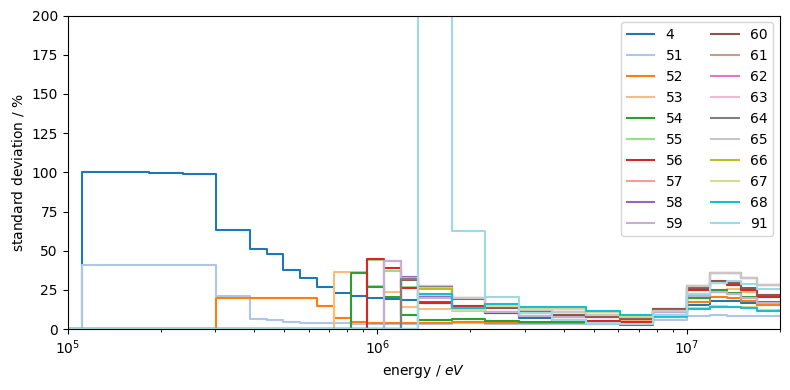

In [6]:
s = cov.get_std().reset_index().query("MT in @mts")
s["ERIGHT"] = [x.right for x in s.E]
s["MT"] = s["MT"].astype("category")
s["STD"] *= 100

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.lineplot(data=s, x="ERIGHT", y="STD", ax=ax, hue="MT", drawstyle="steps-pre", palette="tab20")
ax.set(xlim=(1e5, 2e7), xscale="log", ylim=[0, 200], ylabel="standard deviation / $\%$", xlabel="energy / $eV$")
ax.legend(ncol=2)
fig.tight_layout()

In [7]:
nsmp = 1000
s_lognorm = cov.sampling(nsmp, pdf="lognormal")
s_norm = cov.sampling(nsmp, pdf="normal")

<>:26: SyntaxWarning: invalid escape sequence '\%'
<>:26: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_3632/589667275.py:26: SyntaxWarning: invalid escape sequence '\%'
  ax.set(xlim=(1e5, 2e7), xscale="log", ylim=[0, 200], ylabel="standard deviation / $\%$", xlabel="energy / $eV$")


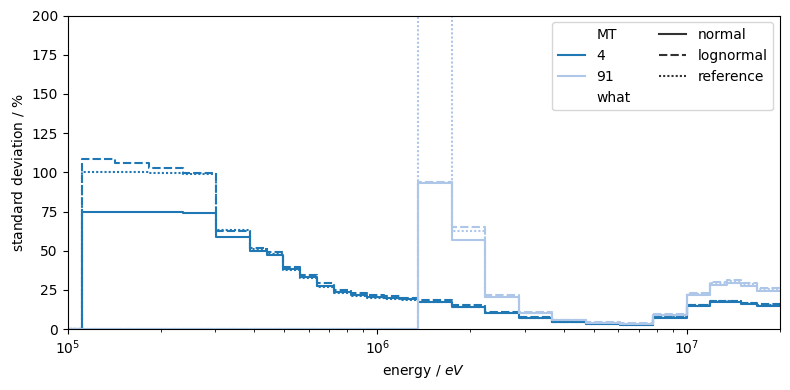

In [8]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

s = s_lognorm.get_rstd().reset_index().query("MT in [4, 91]")
s["ERIGHT"] = [x.right for x in s.E]
s["MT"] = s["MT"].astype("category")
s["RSTD"] *= 100
s = s.assign(what="lognormal")
sln = s

s = s_norm.get_rstd().reset_index().query("MT in [4, 91]")
s["ERIGHT"] = [x.right for x in s.E]
s["MT"] = s["MT"].astype("category")
s["RSTD"] *= 100
s = s.assign(what="normal")
sn = s

s = cov.get_std().reset_index().query("MT in [4, 91]")
s["ERIGHT"] = [x.right for x in s.E]
s["MT"] = s["MT"].astype("category")
s["RSTD"] = s["STD"] * 100
s = s.assign(what="reference")

s = pd.concat([sn, sln, s], ignore_index=True)

sns.lineplot(data=s, x="ERIGHT", y="RSTD", ax=ax, hue="MT", drawstyle="steps-pre", palette="tab20", ls="-", style="what")
ax.set(xlim=(1e5, 2e7), xscale="log", ylim=[0, 200], ylabel="standard deviation / $\%$", xlabel="energy / $eV$")
ax.legend(ncol=2)
fig.tight_layout()